<a href="https://colab.research.google.com/github/yash25512/-SQL-music-data-Analysis/blob/main/Yolo_traffic_signal_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
if 'COLAB_GPU' in os.environ:
  print("GPU IS ENABLED")
else:
  print("not enabled")

GPU IS ENABLED


# Install the YOLO-8

In [2]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.3/981.3 kB 59.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 121.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 100.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 57.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 96.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninsta

# Check if YOLO-8 has been installed properly or not

In [3]:
import ultralytics
ultralytics.checks()

Ultralytics 8.3.112 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 41.0/112.6 GB disk)


# Import Dataset : From Roboflow

In [4]:
# Store data inton a specific directory

%pwd

'/content'

In [5]:
!mkdir RoadSignDetection

In [6]:
!ls

RoadSignDetection


In [7]:
%pwd

'/content'

In [8]:
os.chdir("/content/RoadSignDetection")
%pwd

'/content/RoadSignDetection'

In [9]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="iG9XATDTPyRNFTqlyhPU")
project = rf.workspace("selfdriving-car-qtywx").project("self-driving-cars-lfjou")
version = project.version(6)
dataset = version.download("yolov8")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.2/85.2 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 80.6 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.11.0.86
    Uninstalling opencv-python-headless-4.11.0.86:
      Successfully uninstalled opencv-python-headless-4.11.0.86
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Self-Driving-Cars-6 in yolov8:: 100%|██████████| 9950/9950 [00:01<00:00, 8916.02it/s]


Train the yolov8 over a custom Dataset

In [10]:
os.chdir("/content/RoadSignDetection/Self-Driving-Cars-6")

In [11]:
!yolo task=detect mode=train model=yolov8n.pt data=data.yaml epochs=10 imgsz=640 batch=16

100% 6.25M/6.25M [00:00<00:00, 383MB/s]
Ultralytics 8.3.112 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_

Display some of the content we obtained

In [19]:
!ls '/content/RoadSignDetection/Self-Driving-Cars-6/runs/detect/train'


args.yaml			 PR_curve.png	   val_batch0_labels.jpg
confusion_matrix_normalized.png  R_curve.png	   val_batch0_pred.jpg
confusion_matrix.png		 results.csv	   val_batch1_labels.jpg
F1_curve.png			 results.png	   val_batch1_pred.jpg
labels_correlogram.jpg		 train_batch0.jpg  val_batch2_labels.jpg
labels.jpg			 train_batch1.jpg  val_batch2_pred.jpg
P_curve.png			 train_batch2.jpg  weights


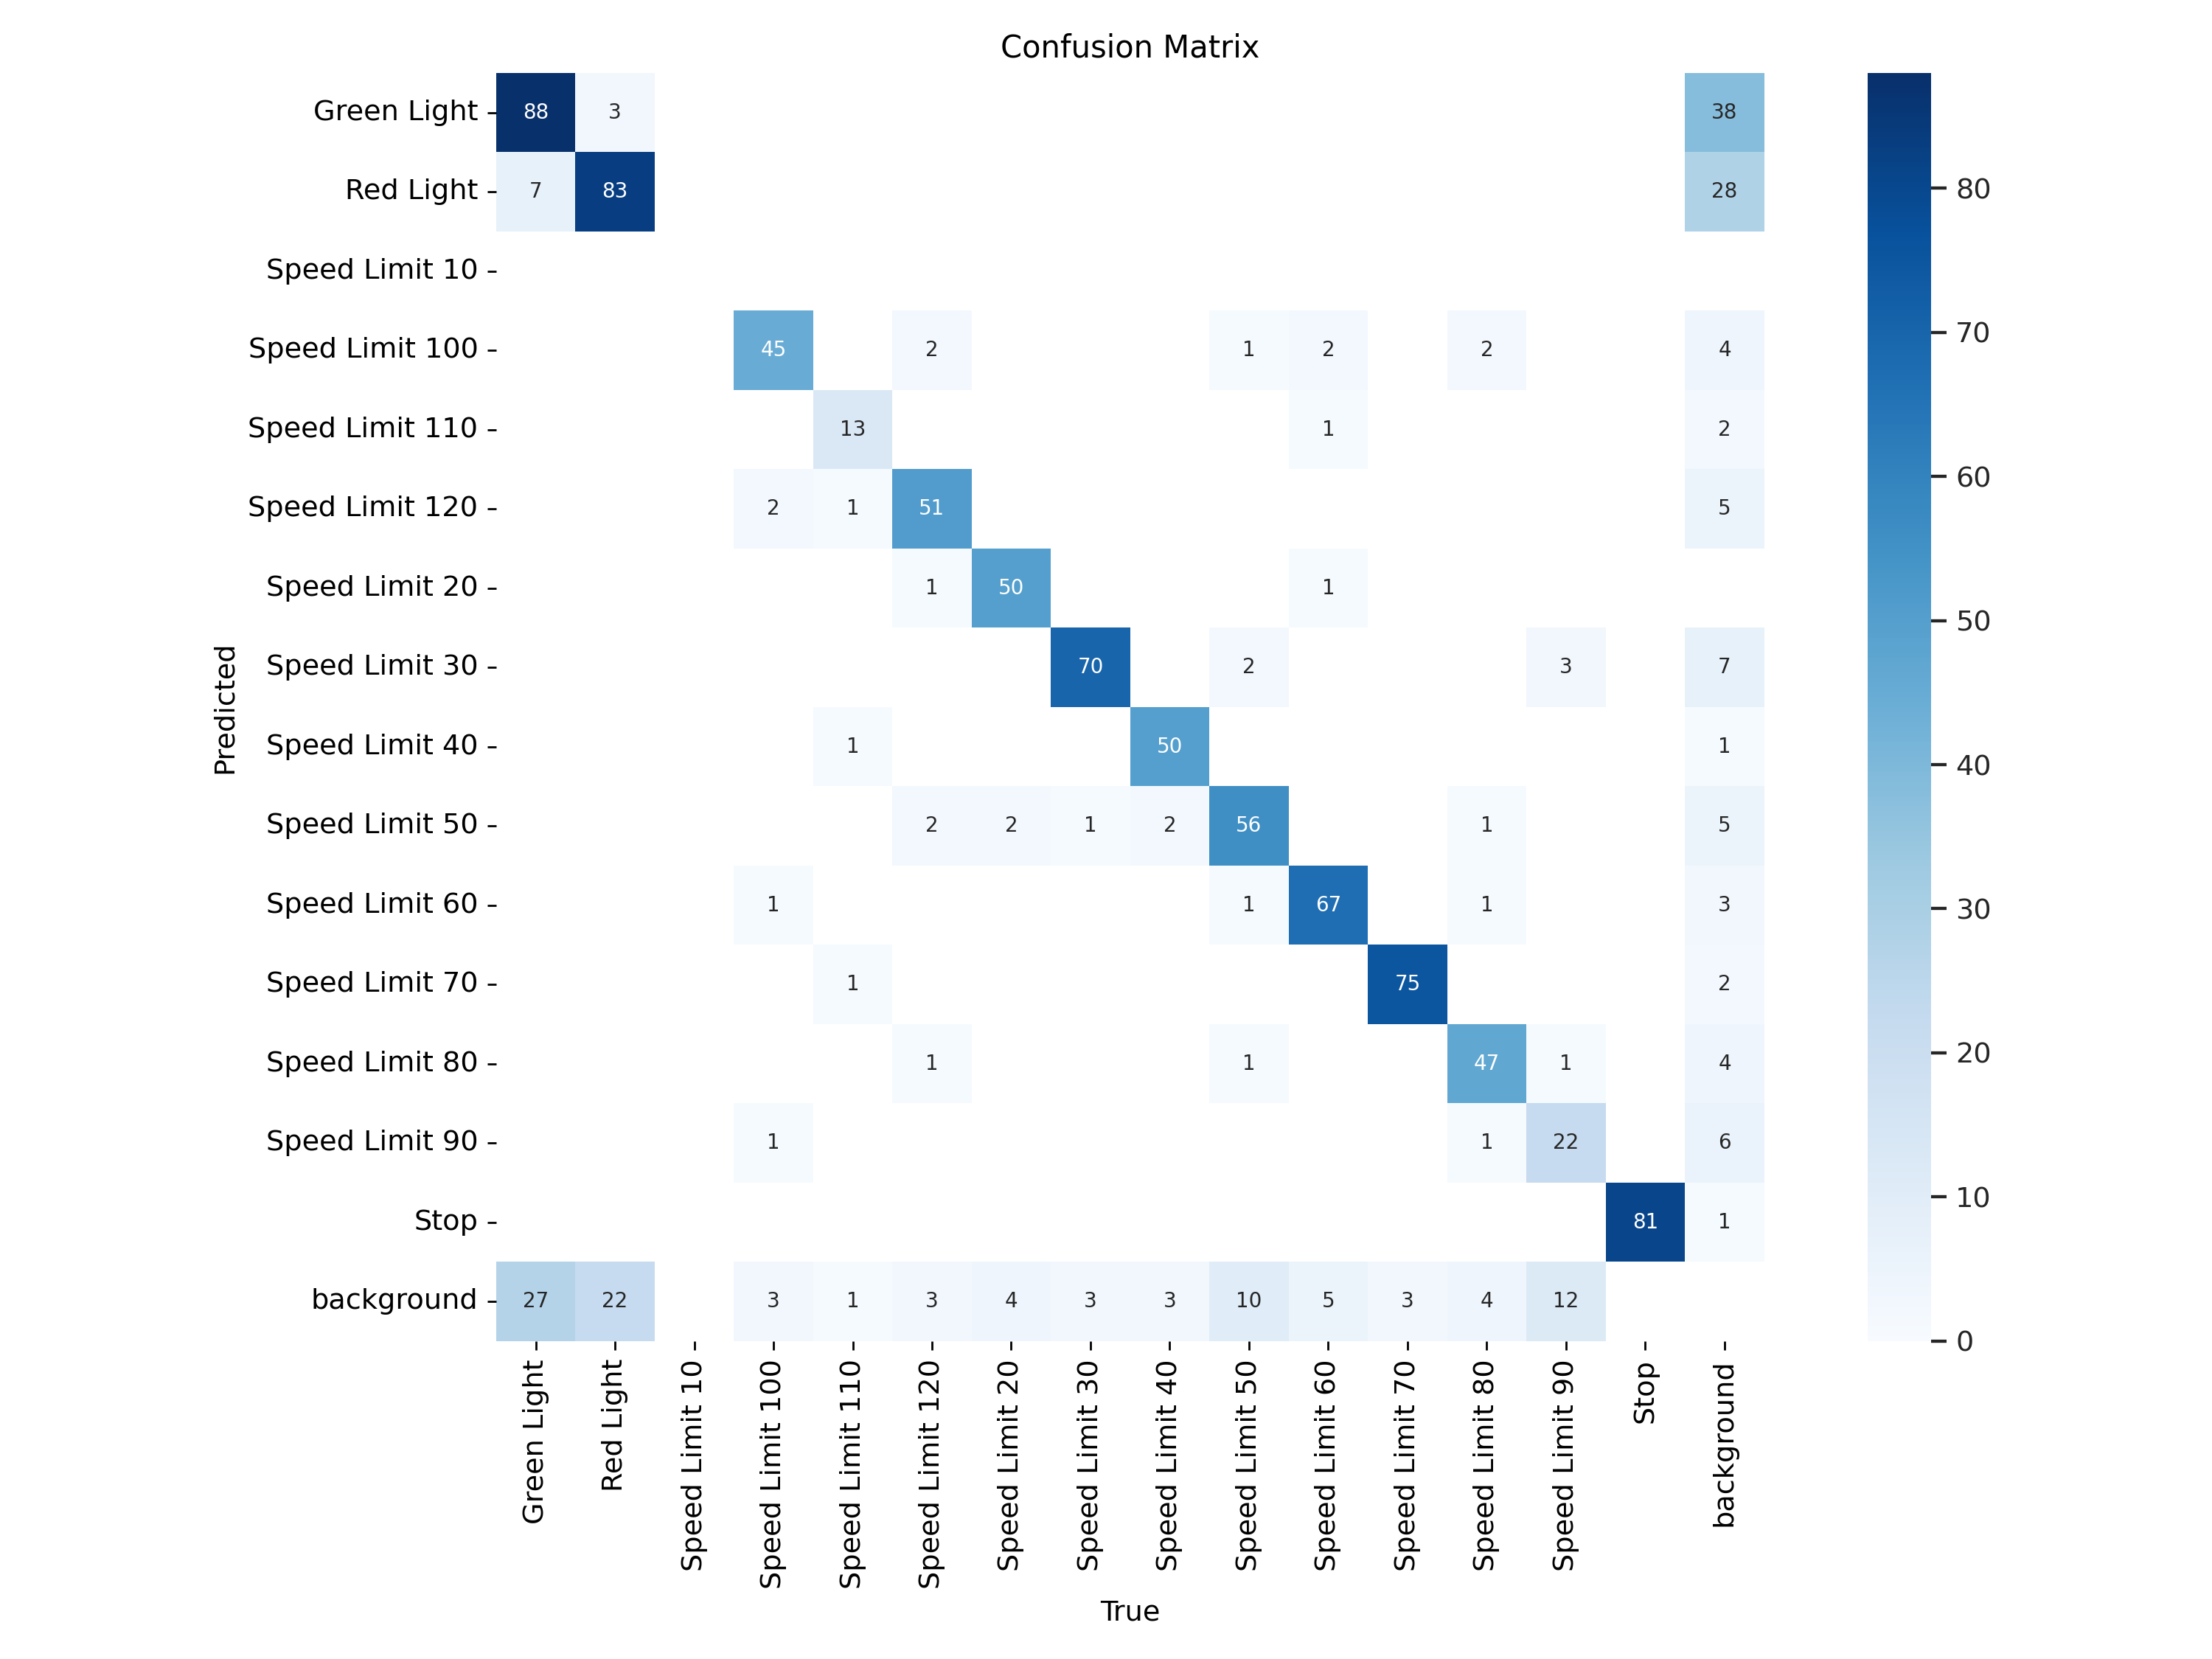

In [20]:
resultData="/content/RoadSignDetection/Self-Driving-Cars-6/runs/detect/train/"

from IPython.display import Image,display
Image(filename=f'{resultData}confusion_matrix.png')

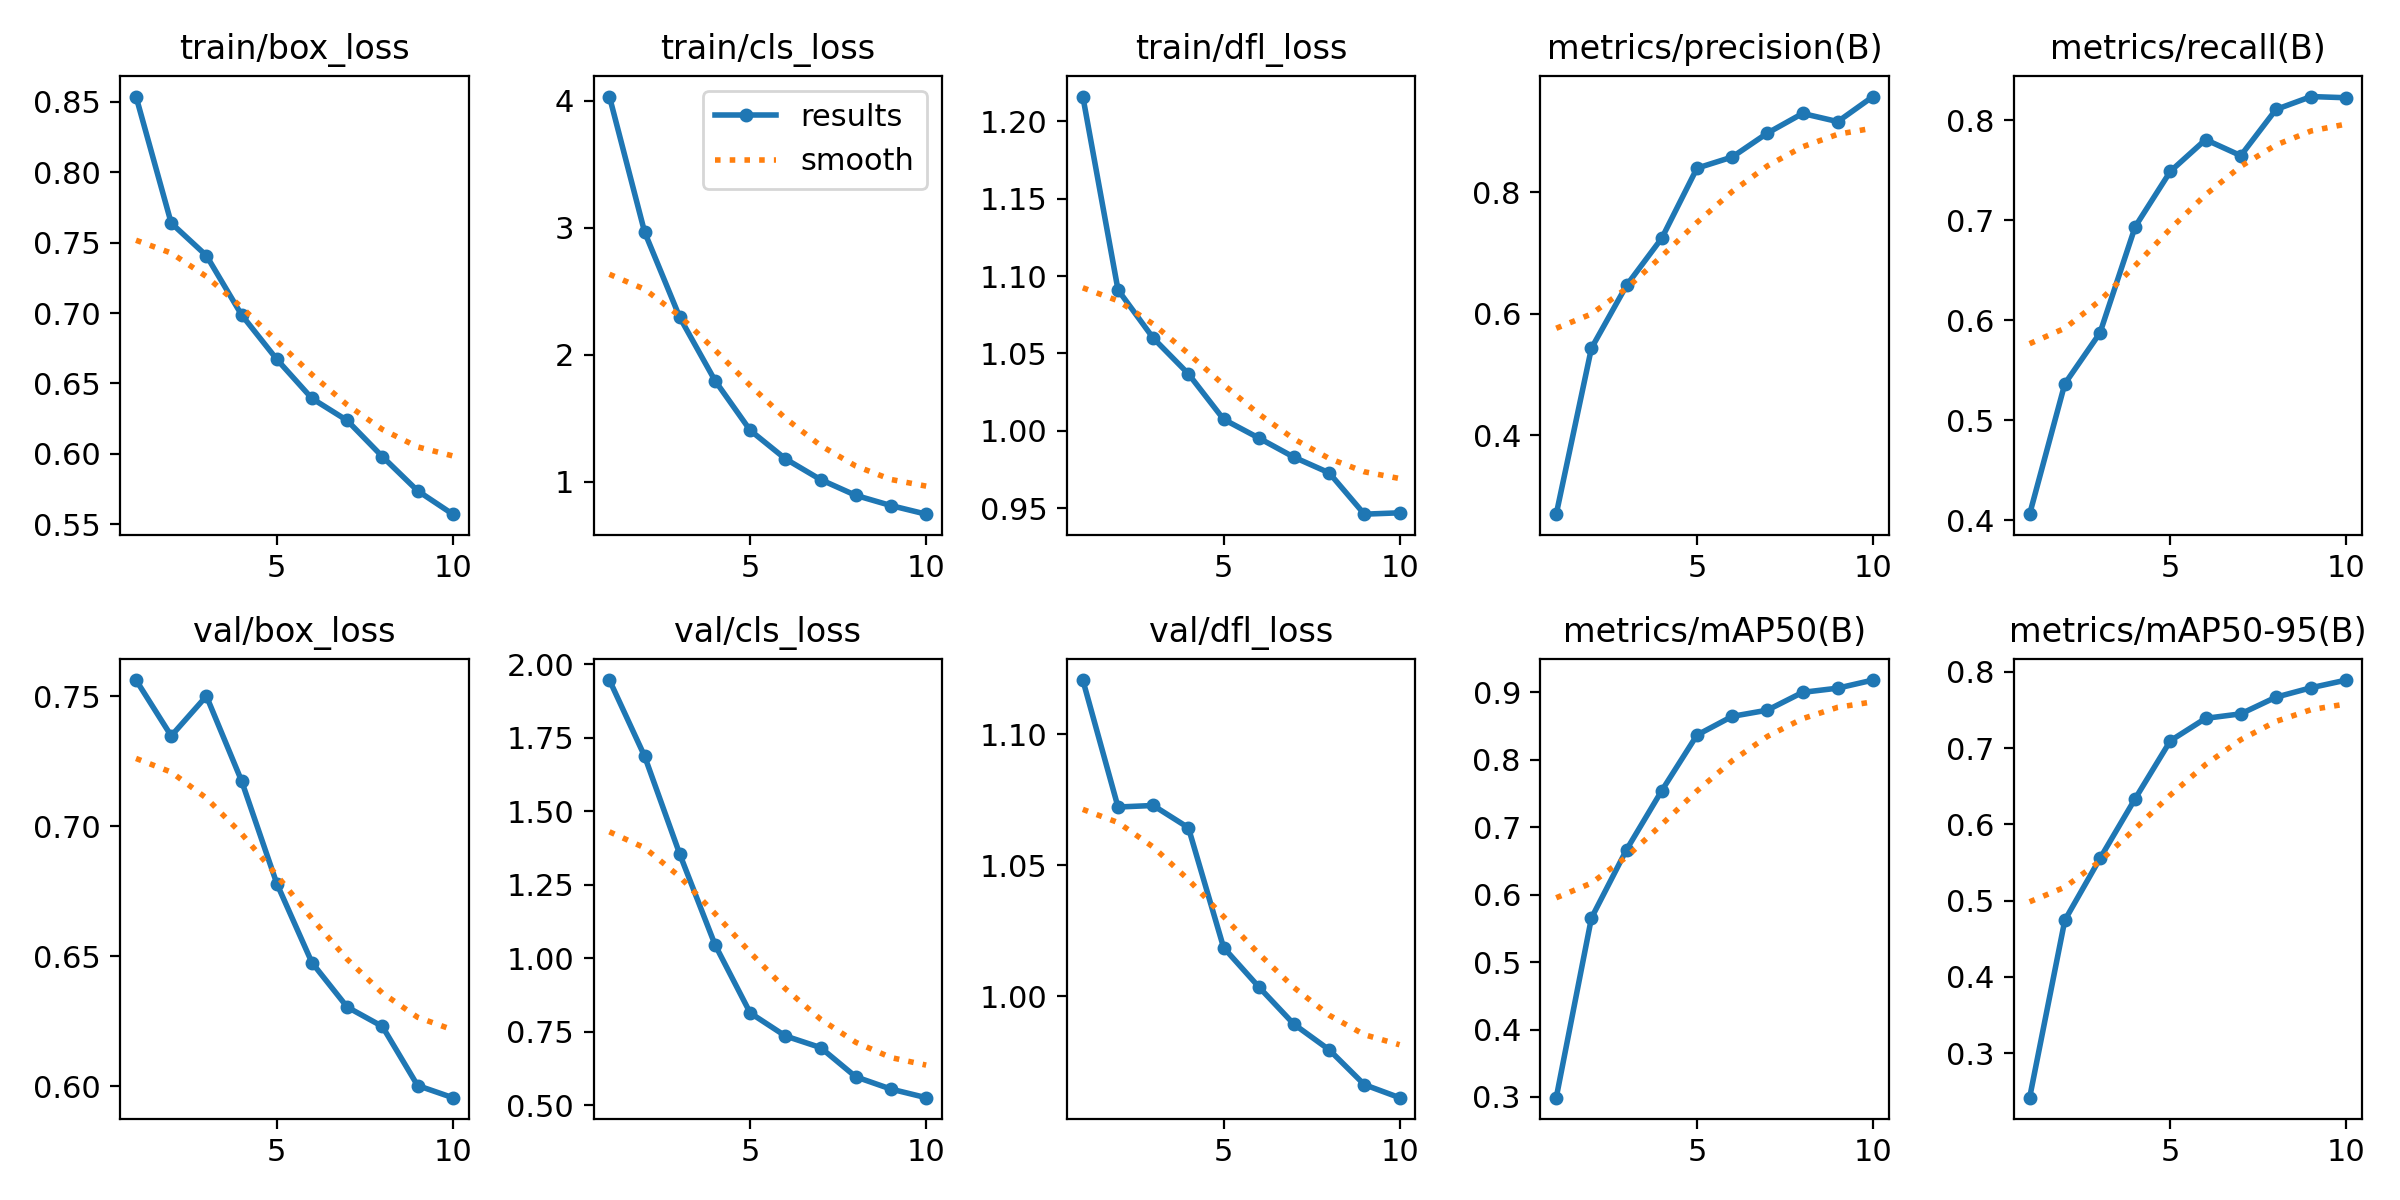

In [22]:
Image(filename=f'{resultData}results.png')

In [26]:
import pandas as pd
df=pd.read_csv(f'{resultData}results.csv')

In [28]:
df.tail(5)

,epoch,time,train/box_loss,train/cls_loss,train/dfl_loss,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),val/box_loss,val/cls_loss,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2
5,6,390.456,0.63932,1.18132,0.99541,0.85762,0.78065,0.86449,0.73891,0.64747,0.73527,1.00351,0.000266,0.000266,0.000266
6,7,454.531,0.62368,1.01763,0.98301,0.89697,0.76462,0.87371,0.74485,0.63041,0.69577,0.98924,0.000214,0.000214,0.000214
7,8,518.299,0.59804,0.89370,0.97291,0.92927,0.81079,0.90010,0.76670,0.62294,0.59631,0.97949,0.000161,0.000161,0.000161
8,9,581.924,0.57378,0.81333,0.94623,0.91585,0.82371,0.90635,0.77909,0.60022,0.55463,0.96616,0.000109,0.000109,0.000109
9,10,645.341,0.55715,0.74561,0.94711,0.95708,0.82251,0.91836,0.78915,0.59554,0.52543,0.96119,0.000057,0.000057,0.000057


Validate the Model

making predictions with the help of model

In [29]:
%pwd

'/content/RoadSignDetection/Self-Driving-Cars-6'

In [30]:
os.chdir("/content")

In [31]:
%pwd

'/content'

In [32]:
!mkdir ManaulTestingData

In [35]:
#weightpath="/content/RoadSignDetection/Self-Driving-Cars-6/runs/detect/train/weights"

!yolo task=detect mode=predict model="/content/RoadSignDetection/Self-Driving-Cars-6/runs/detect/train/weights/best.pt" conf=.25 source='/content/ManaulTestingData/2869107-uhd_3840_2160_24fps.mp4'

Ultralytics 8.3.112 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,008,573 parameters, 0 gradients, 8.1 GFLOPs

video 1/1 (frame 1/174) /content/ManaulTestingData/2869107-uhd_3840_2160_24fps.mp4: 384x640 (no detections), 37.2ms
video 1/1 (frame 2/174) /content/ManaulTestingData/2869107-uhd_3840_2160_24fps.mp4: 384x640 (no detections), 10.1ms
video 1/1 (frame 3/174) /content/ManaulTestingData/2869107-uhd_3840_2160_24fps.mp4: 384x640 1 Green Light, 10.2ms
video 1/1 (frame 4/174) /content/ManaulTestingData/2869107-uhd_3840_2160_24fps.mp4: 384x640 1 Green Light, 10.5ms
video 1/1 (frame 5/174) /content/ManaulTestingData/2869107-uhd_3840_2160_24fps.mp4: 384x640 1 Green Light, 10.5ms
video 1/1 (frame 6/174) /content/ManaulTestingData/2869107-uhd_3840_2160_24fps.mp4: 384x640 1 Green Light, 14.1ms
video 1/1 (frame 7/174) /content/ManaulTestingData/2869107-uhd_3840_2160_24fps.mp4: 384x640 (no detections), 8.7ms
video 1/1 (frame 8/174) /content/

In [36]:
!yolo task=detect mode=predict model="/content/RoadSignDetection/Self-Driving-Cars-6/runs/detect/train/weights/best.pt" conf=.25 source="/content/ManaulTestingData/3087324-uhd_3840_2160_30fps.mp4"

Ultralytics 8.3.112 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,008,573 parameters, 0 gradients, 8.1 GFLOPs

video 1/1 (frame 1/344) /content/ManaulTestingData/3087324-uhd_3840_2160_30fps.mp4: 384x640 1 Red Light, 42.1ms
video 1/1 (frame 2/344) /content/ManaulTestingData/3087324-uhd_3840_2160_30fps.mp4: 384x640 1 Red Light, 9.9ms
video 1/1 (frame 3/344) /content/ManaulTestingData/3087324-uhd_3840_2160_30fps.mp4: 384x640 1 Red Light, 9.6ms
video 1/1 (frame 4/344) /content/ManaulTestingData/3087324-uhd_3840_2160_30fps.mp4: 384x640 1 Red Light, 10.2ms
video 1/1 (frame 5/344) /content/ManaulTestingData/3087324-uhd_3840_2160_30fps.mp4: 384x640 1 Red Light, 10.1ms
video 1/1 (frame 6/344) /content/ManaulTestingData/3087324-uhd_3840_2160_30fps.mp4: 384x640 1 Red Light, 10.0ms
video 1/1 (frame 7/344) /content/ManaulTestingData/3087324-uhd_3840_2160_30fps.mp4: 384x640 1 Red Light, 10.6ms
video 1/1 (frame 8/344) /content/ManaulTestingData/308

In [38]:
!yolo task=detect mode=predict model="/content/RoadSignDetection/Self-Driving-Cars-6/runs/detect/train/weights/best.pt" conf=.25 source="/content/ManaulTestingData/5873416-uhd_3840_2160_24fps.mp4"

Ultralytics 8.3.112 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,008,573 parameters, 0 gradients, 8.1 GFLOPs

video 1/1 (frame 1/240) /content/ManaulTestingData/5873416-uhd_3840_2160_24fps.mp4: 384x640 1 Stop, 36.9ms
video 1/1 (frame 2/240) /content/ManaulTestingData/5873416-uhd_3840_2160_24fps.mp4: 384x640 1 Stop, 11.1ms
video 1/1 (frame 3/240) /content/ManaulTestingData/5873416-uhd_3840_2160_24fps.mp4: 384x640 1 Stop, 14.3ms
video 1/1 (frame 4/240) /content/ManaulTestingData/5873416-uhd_3840_2160_24fps.mp4: 384x640 1 Stop, 10.4ms
video 1/1 (frame 5/240) /content/ManaulTestingData/5873416-uhd_3840_2160_24fps.mp4: 384x640 1 Stop, 10.8ms
video 1/1 (frame 6/240) /content/ManaulTestingData/5873416-uhd_3840_2160_24fps.mp4: 384x640 1 Stop, 10.5ms
video 1/1 (frame 7/240) /content/ManaulTestingData/5873416-uhd_3840_2160_24fps.mp4: 384x640 1 Stop, 11.1ms
video 1/1 (frame 8/240) /content/ManaulTestingData/5873416-uhd_3840_2160_24fps.mp4: 384